In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import datetime
import time
from IPython.display import display, Markdown, Latex
%matplotlib inline

In [2]:
df = pd.read_csv('Police_Stop_Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Timestamp format
resp_timestamp = '%Y-%m-%dT%H:%M:%S.%fZ'

# Extract parts of a timestamp
#df['response_hour'] = df['responseDate'].apply(lambda x: 
#                      datetime.datetime.strptime(x, resp_timestamp).hour)
#df['response_ymd'] = df['responseDate'].apply(lambda x: 
#                      datetime.datetime.strptime(x, resp_timestamp).date())
#
#df['response_dow'] = df['responseDate'].apply(lambda x: 
#                      datetime.datetime.strptime(x, resp_timestamp).weekday())
#

df['response_month'] = df['responseDate'].apply(lambda x: 
                                               datetime.datetime.strptime(x, resp_timestamp).month)

df['response_ym'] = df['responseDate'].apply(lambda x: 
                         str(datetime.datetime.strptime(x, resp_timestamp).year) + 
                         "-" +
                         str("{:02d}".format(datetime.datetime.strptime(x, resp_timestamp).month))
                        )

In [4]:
# Zero out coordinates that are NaN. 
# I wasn't able to plot points on a map with NaNs present in these columns.
def nan_to_zero(coord):
    if np.isnan(coord):
        return 0
    elif coord == 'nan':
        return 0
    else:
        return coord

df['long'] = df['long'].apply(nan_to_zero)
df['lat'] = df['lat'].apply(nan_to_zero)

In [ ]:
df.loc[df['callDisposition'].isin(advised) & df['citationIssued'].isin(['YES','NO'])]['race'].value_counts()

In [7]:
df_tagged_no_citation = df.loc[df['callDisposition'].isin(ticket_tow) & \
                              (~df['citationIssued'].isna())]
df_tagged_no_citation['citationIssued'].value_counts()

NameError: name 'ticket_tow' is not defined

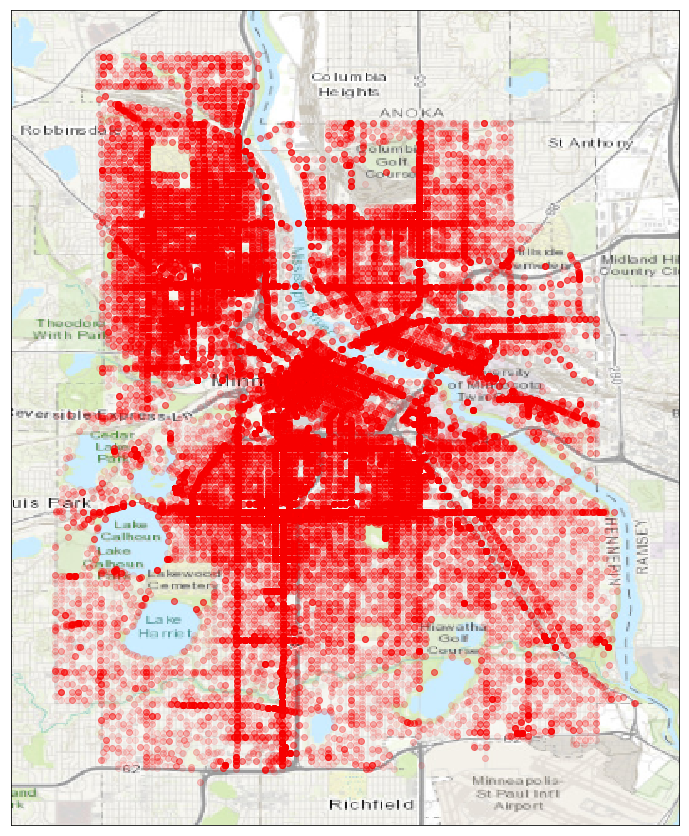

In [6]:
def map_df(df):
# Determine min/max latitude and longitude based on the data we have to plot.
#  Apparently lat/long coordinates need to be rounded to 3 decimal places.
#  min_lat and max_long may be 0 or nan and we don't want those here.

    pad = .01
    min_lat = round(df.loc[df['lat'] > 0]['lat'].min() - pad,3)
    max_lat = round(df['lat'].max() + pad,3)
    min_long = round(df['long'].min() - pad,3)
    max_long = round(df.loc[df['long'] < 0]['long'].max() + pad,3)

# Set map colors based on problem
    my_categories = df['race'].unique()
    my_cmap = plt.get_cmap('Paired')
    my_categories_len = len(my_categories)
    to_dict_problems = pd.Series(my_categories)
#    print(to_dict_problems)

#    cmap_vals = {}
#    for this_num, category in enumerate(my_categories):
#        cmap_vals[category] = this_num / my_categories_len

#    print(cmap_vals)
    fig, ax = plt.subplots(figsize=(15,15))
    map = Basemap(projection='merc',
                  llcrnrlat=min_lat, llcrnrlon=min_long,
                  urcrnrlat=max_lat, urcrnrlon=max_long,
                  resolution=None, epsg=4269)
    map.arcgisimage(service='World_Topo_Map')
    map.scatter(df['long'], df['lat'], latlon=True,
#              s=station_freq[df_plot[station_id]],
                #c=my_cmap(cmap_vals),#[df['race']]),#(station_flow[df_plot[station_id]]),
                c='Red',
                alpha=.1)

map_df(df)